In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

In [3]:
import sys

In [4]:
sys.path.append('..')

In [5]:
import numpy as np
import pandas as pd

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [7]:
%matplotlib inline

In [8]:
from this_project.censusdata import fetch_censusdata

In [9]:
X, y = fetch_censusdata()

In [10]:
X

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States


Create a dataframe containing the `X` data with additional `target` column containing `y`

In [11]:
df = X.copy()
df['target'] = y
df_corr = df.corr()

# Missing Values

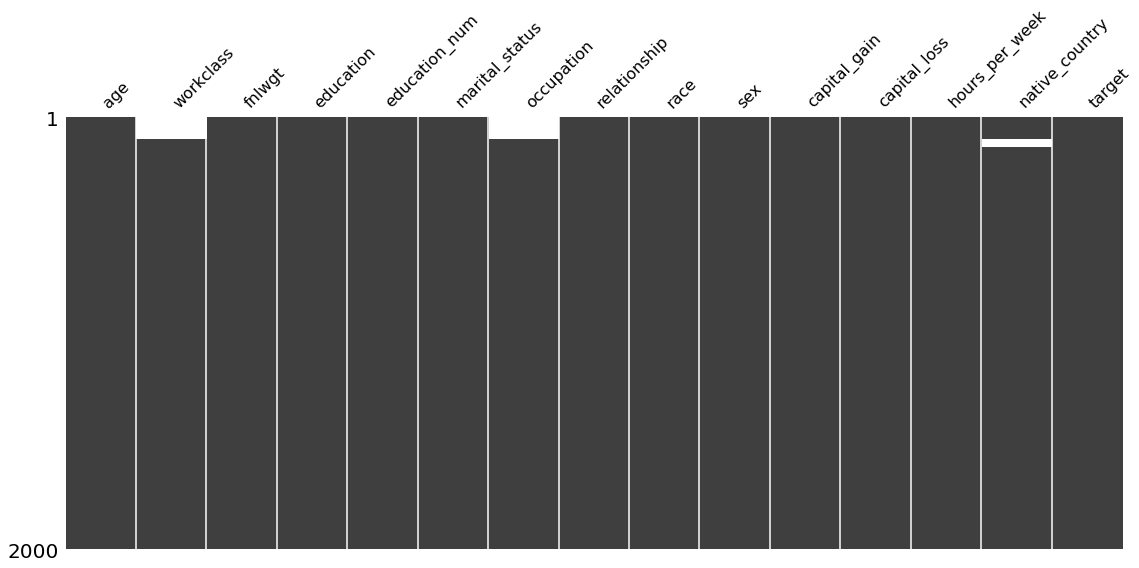

In [12]:
fig, ax = plt.subplots(1, 1, figsize=(16, 8))

msno.matrix(df.sample(2000), sort='ascending', ax=ax)

plt.tight_layout()
plt.savefig('missing.matrix.png')

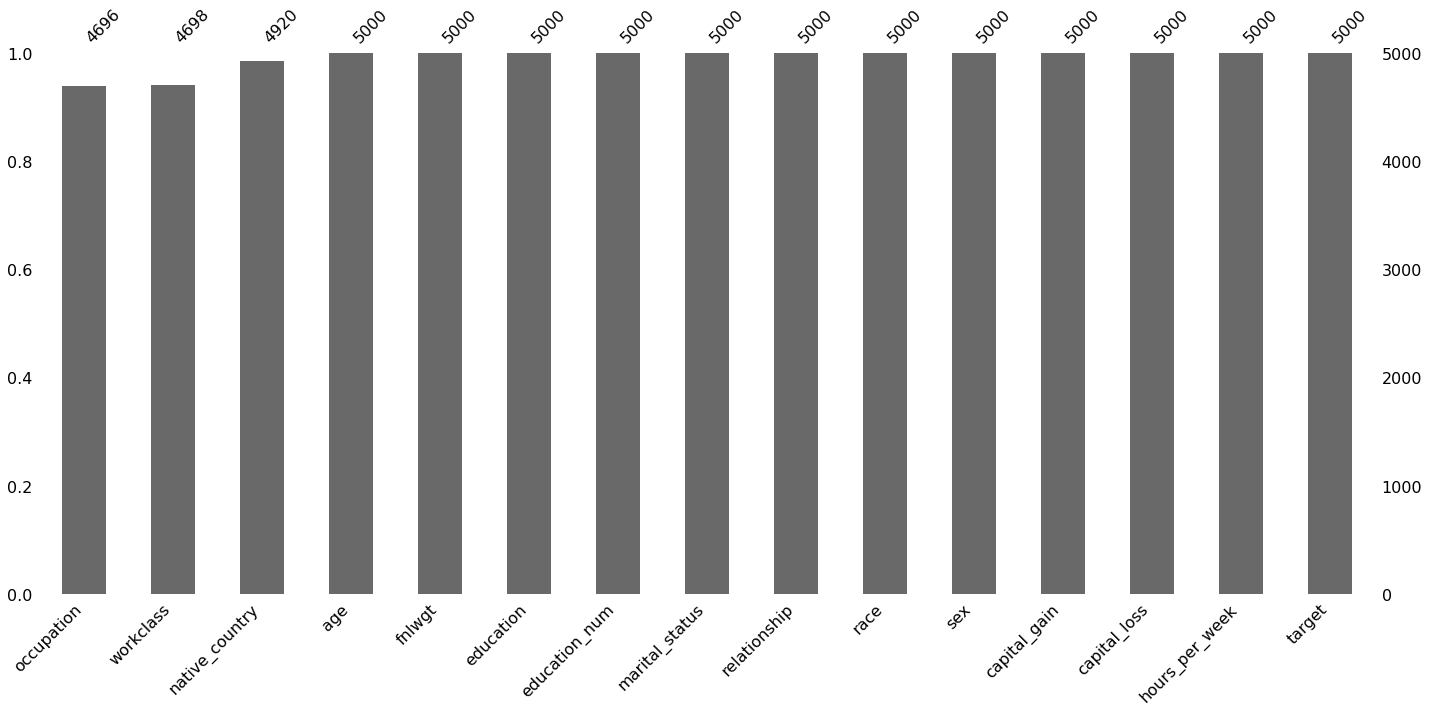

In [13]:
fig, ax = plt.subplots(1, 1, figsize=(20, 10))

msno.bar(df.sample(5000), sort='ascending', ax=ax)

plt.tight_layout()
plt.savefig('missing.bar.png')

# Class Ratio

<AxesSubplot:xlabel='target', ylabel='count'>

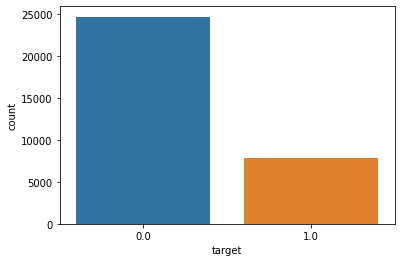

In [14]:
sns.countplot(x='target', data=df)

<AxesSubplot:xlabel='count', ylabel='sex'>

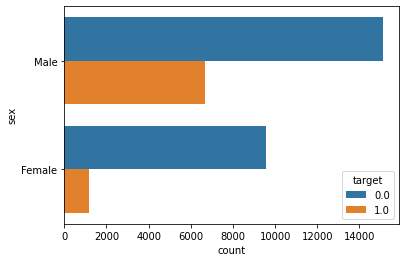

In [15]:
sns.countplot(y='sex', hue='target', data=df)

<AxesSubplot:xlabel='count', ylabel='race'>

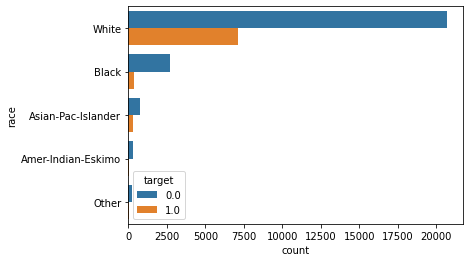

In [16]:
sns.countplot(y='race', hue='target', data=df)

<AxesSubplot:xlabel='age', ylabel='race'>

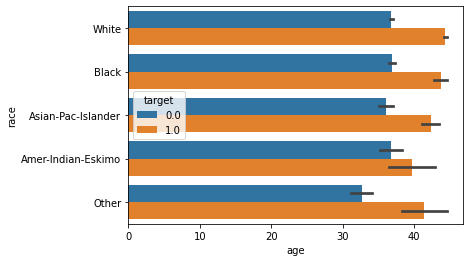

In [17]:
sns.barplot(y='race', x='age', hue='target', data=df)

# Distributions

In [18]:
# sns.pairplot(df, hue="target")

# Correlation Matrix

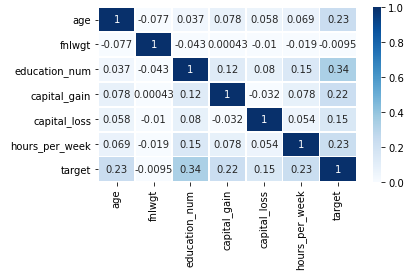

In [25]:
sns.heatmap(df_corr, vmin=0, vmax=1, cmap="Blues", linewidths=0.5, annot=True)

plt.tight_layout()
plt.savefig('correlation_matrix.png')

# Predictive Power

In [26]:
import ppscore as pps

In [27]:
df_ppsm = pps.matrix(df)

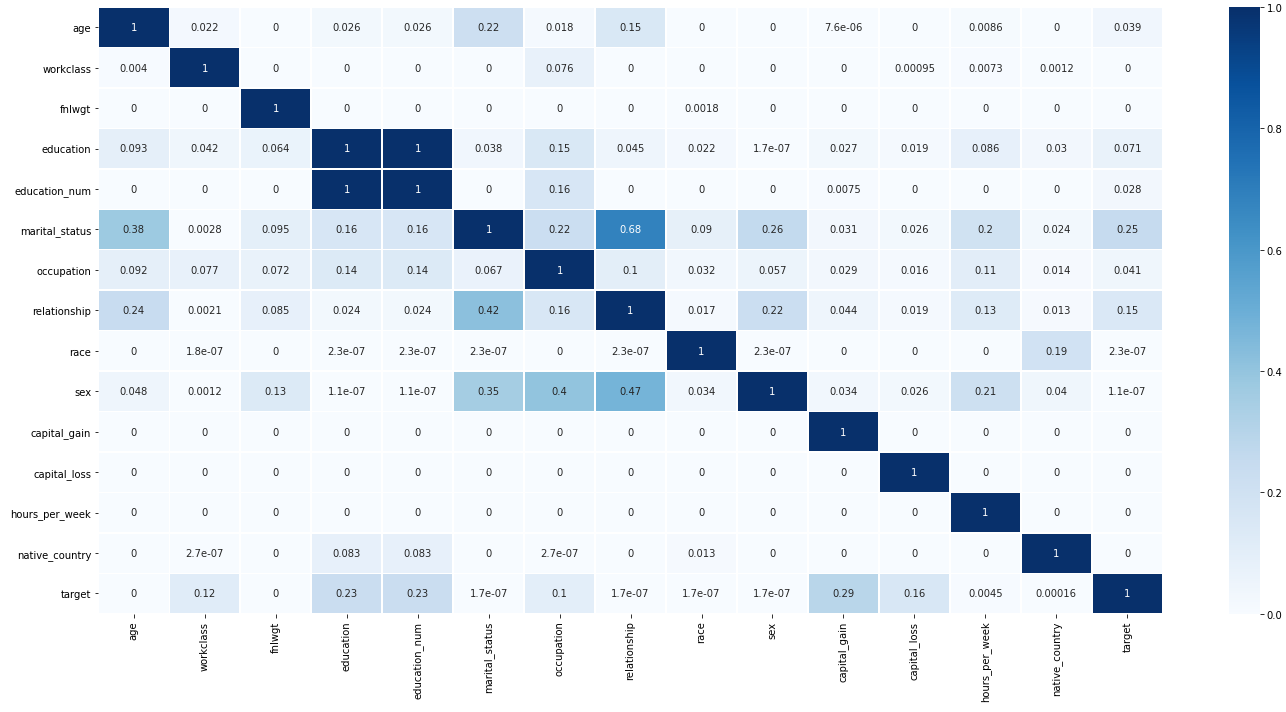

In [29]:
plt.figure(figsize=(20,10))

sns.heatmap(df_ppsm, vmin=0, vmax=1, cmap="Blues", linewidths=0.5, annot=True)

plt.tight_layout()
plt.savefig('pps.matrix.png')